In [1]:
%load_ext autoreload
%autoreload 2

In [47]:
import review_analyzer.plots as p
p.show_image('https://i.imgur.com/1wkvHHD.png')

# 1. Descripción del Problema

El proyecto desarrolla un sistema que analiza emociones y perspectiva (positiva o negativa) en reseñas online sobre productos y servicios, usando NLP y machine learning, para generar insights útiles a marcas y negocios.

Diccionario de datos
| Variable            | Tipo       | Descripción |
|---------------------|------------|-------------|
| user              | Object     | Nombre de usuario |
| user_id           | int        | ID del usuario |
| text              | object     | Comentario realizado por el usuario |
| like              | int        | Cantidad de likes en un comentario |
| reply_count       | int        | Cantidad de respuestas en un comentario |
| timestamp         | object     | Código de la fecha |
| fecha_legible     | object     | Fecha del comentario realizado |
| tipo_de_item      | object     | Tipo de producto o servicio comentado |
| emocion           | object     | Emoción detectada en el comentario |

# 2. Análisis Exploratorio de Datos (EDA)

Objetivo: Comprender el dataset y su distribución para tomar decisiones del modelo.

Dataset: Datos obtenidos mediante consulta a las APIs oficiales de plataformas digitales, integrados y preparados para el EDA y limpieza.

In [3]:
import review_analyzer.config as rp
import pandas as pd

In [11]:
df = pd.read_csv(rp.GOLDEN_SET_LABELED_PATH)
df.head()

,user,user_id,text,like,reply_count,timestamp,fecha_legible,tipo_de_item,emocion
0,Navarrete 🦇,zoeee_77777,la vrdd no yo tenía el pelo en pelo en pausa y...,443,5,1728426278,2024-10-08 17:24:38,belleza-y-cuidado,testimonio
1,LaCherryBoop,cherryboopxxx,Mí hermano es químico farmacéutico y dice que ...,910,8,1716524639,2024-05-23 23:23:59,belleza-y-cuidado,testimonio
2,Ori✨,orianaa_rosaless,"úsenlo, yo tenía el cabello horrible y no sabe...",3827,32,1633898429,2021-10-10 15:40:29,belleza-y-cuidado,satisfaccion
3,K'rol Rojas,karolrojas018,mi cabello cambio por completo desde que la em...,1587,41,1633893792,2021-10-10 14:23:12,belleza-y-cuidado,satisfaccion
4,Fer💗,fer622301,si es mala? es que la acabo de comprar la rosa...,11,7,1737934854,2025-01-26 18:40:54,belleza-y-cuidado,consulta


In [12]:
with pd.option_context('display.max_colwidth', None):
    print(df.head())

           user           user_id  \
0   Navarrete 🦇       zoeee_77777   
1  LaCherryBoop     cherryboopxxx   
2          Ori✨  orianaa_rosaless   
3   K'rol Rojas     karolrojas018   
4          Fer💗         fer622301   

                                                                                                                                                                             text  \
0                                           la vrdd no yo tenía el pelo en pelo en pausa y empecé a usar mascarillas para pelo\n1.de garnier fructis 😍\n2.nutribela😍\n3.pantene 😍   
1  Mí hermano es químico farmacéutico y dice que recomienda estos productos porque son más naturales que otras mascarillas, así también una mascarilla de Pantene que amo usar. 🤔   
2                                                                        úsenlo, yo tenía el cabello horrible y no saben el cambio que me dio cuando lo empecé a usar, es mágico.   
3                                     mi cabello camb

In [13]:
df['emocion'].notnull().sum()

np.int64(9668)

In [14]:
df['emocion'].value_counts()

emocion
entusiasmo      3547
consulta        1444
testimonio      1135
satisfaccion    1060
decepcion        593
queja            535
frustracion      498
sorpresa         468
confusion        388
Name: count, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9669 entries, 0 to 9668
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user           9579 non-null   object
 1   user_id        9669 non-null   object
 2   text           9120 non-null   object
 3   like           9669 non-null   int64 
 4   reply_count    9669 non-null   int64 
 5   timestamp      9669 non-null   int64 
 6   fecha_legible  9669 non-null   object
 7   tipo_de_item   9669 non-null   object
 8   emocion        9668 non-null   object
dtypes: int64(3), object(6)
memory usage: 680.0+ KB


In [16]:
df_fila = df[df['user_id'] == 'mr.dorastic97']
df_fila

,user,user_id,text,like,reply_count,timestamp,fecha_legible,tipo_de_item,emocion
9575,Dr.Dorastic,mr.dorastic97,🪤🪤🪤🪤🪤🪤🪤🪤🪤🪤,0,0,1735357244,2024-12-27 22:40:44,servicio-mcdonalds,sorpresa


In [17]:
df_columna_nula = df[df['text'].isnull()]
df_columna_nula

,user,user_id,text,like,reply_count,timestamp,fecha_legible,tipo_de_item,emocion
2080,liz,lizchapiliquin,NaN,0,0,1746486105,2025-05-05 18:01:45,cuidado-piel,decepcion
2091,yuliano,yuliano1717,NaN,0,0,1745966494,2025-04-29 17:41:34,cuidado-piel,satisfaccion
2092,NaN,xo.lily24,NaN,0,0,1745957535,2025-04-29 15:12:15,cuidado-piel,satisfaccion
2093,saraaa,saraaa71457,NaN,0,0,1745427949,2025-04-23 12:05:49,cuidado-piel,satisfaccion
2094,tan,akaddh,NaN,0,0,1745218036,2025-04-21 01:47:16,cuidado-piel,satisfaccion
...,...,...,...,...,...,...,...,...,...
4611,gonzalo carpio galle,gonzalocarpiogallegos,NaN,0,0,1740154240,2025-02-21 11:10:40,perfume,entusiasmo
4620,franks pinado,tumarroncito20,NaN,0,0,1740151432,2025-02-21 10:23:52,perfume,confusion
4653,lotso,lotso504,NaN,0,0,1740145004,2025-02-21 08:36:44,perfume,frustracion
4685,radamanthys death,radamanthys76,NaN,0,0,1740141864,2025-02-21 07:44:24,perfume,sorpresa


In [18]:
df['comment_length'] = df['text'].astype(str).apply(len)

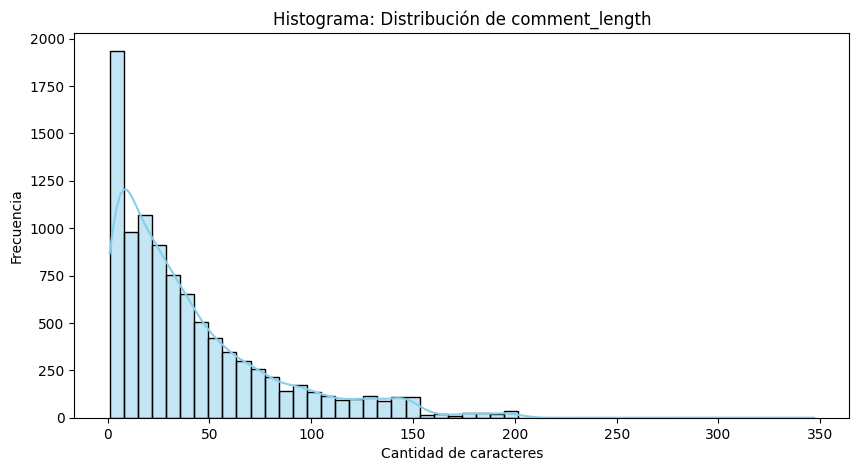

In [19]:
p.plot_histo(df, 'comment_length')

La gran mayoría de comentarios tienen menos de 20 caracteres.

A partir de los ~150 caracteres, la frecuencia cae casi a cero, y solo aparecen unos pocos comentarios muy largos (outliers).

Tal vez valga la pena establecer un límite superior de longitud para filtrar entradas irrelevantes. Ya lo veremos.

In [20]:
df['time'] = pd.to_datetime(df['fecha_legible'], errors='coerce')

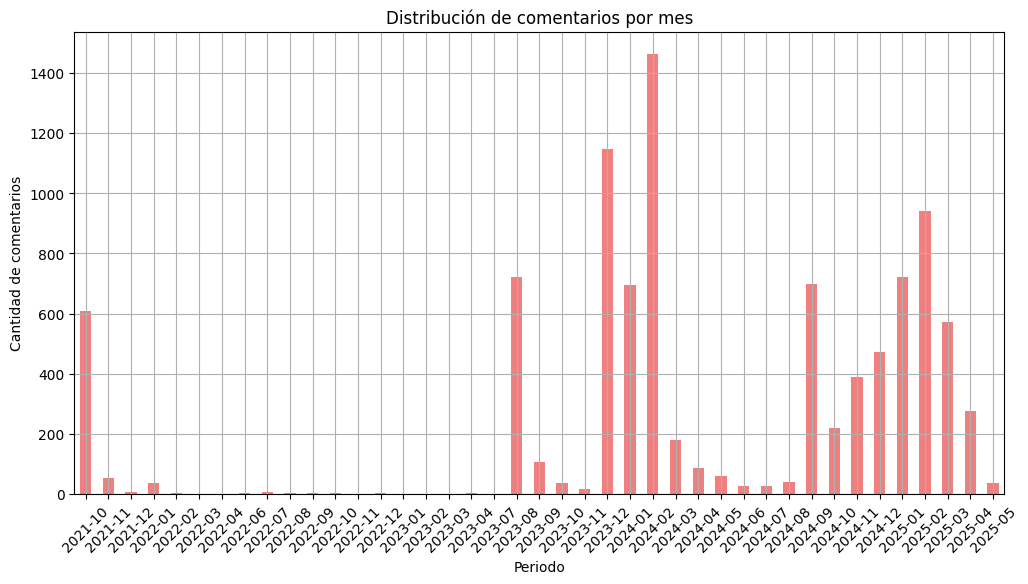

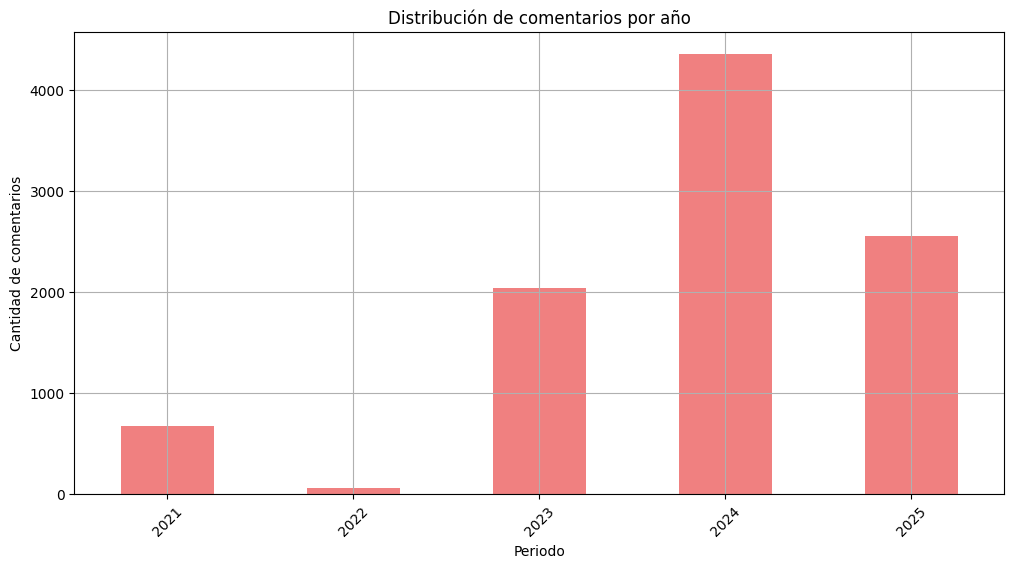

In [21]:
p.plot_comments_by_time(df, time_column='time', period='M')
p.plot_comments_by_time(df, time_column='time', period='Y')

Los comentarios no están uniformemente distribuidos en el tiempo: la mayoría de los datos provienen de 2023, 2024 y 2025, mientras que 2021 y 2022 tienen menor representación, por lo que es importante considerar el sesgo temporal al analizar y modelar los datos.

In [22]:
df.describe()

,like,reply_count,timestamp,comment_length,time
count,9669.000000,9669.000000,9.669000e+03,9669.000000,9669
mean,7.665219,0.346468,1.713413e+09,40.863481,2024-04-17 23:05:38.699348480
min,0.000000,0.000000,1.633886e+09,1.000000,2021-10-10 12:10:03
25%,0.000000,0.000000,1.703745e+09,11.000000,2023-12-28 01:26:10
50%,0.000000,0.000000,1.708869e+09,28.000000,2024-02-25 08:47:30
75%,0.000000,0.000000,1.736012e+09,57.000000,2025-01-04 12:32:37
max,9228.000000,98.000000,1.746495e+09,347.000000,2025-05-05 20:35:46
std,159.693988,2.371465,2.754100e+07,39.964708,NaN


- La mayoría de los comentarios son relativamente cortos, sin likes ni respuestas.

- Existen pocos comentarios “virales” con muchos likes o respuestas, que elevan los máximos y promedios.

- El promedio es 40.45 caracteres, con mediana de 28, lo que indica que la distribución está sesgada a la derecha (algunos comentarios son muy largos y elevan el promedio).

- El engagement general (likes y replies) es bajo para la mayoría, pero los outliers dominan las métricas agregadas.

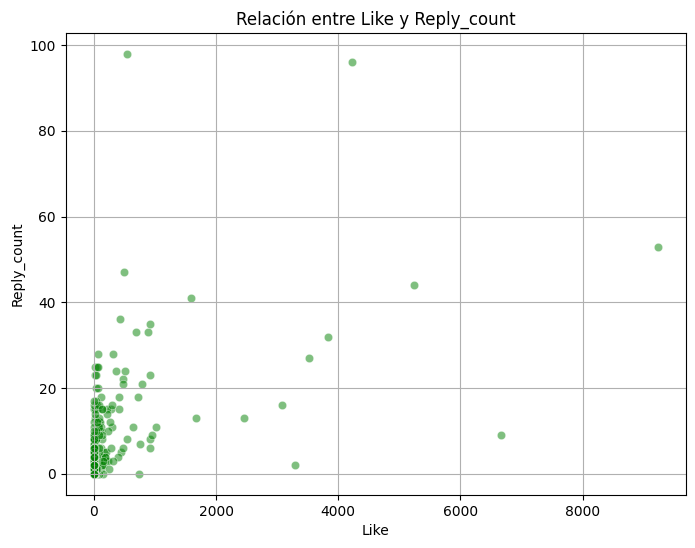

In [23]:
p.plot_correlation_scatter(df, 'like', 'reply_count', color='green')

No se observa una correlación clara entre likes y reply_count: la mayoría de los comentarios tiene valores bajos, y los casos con muchos likes no muestran un aumento proporcional en respuestas.

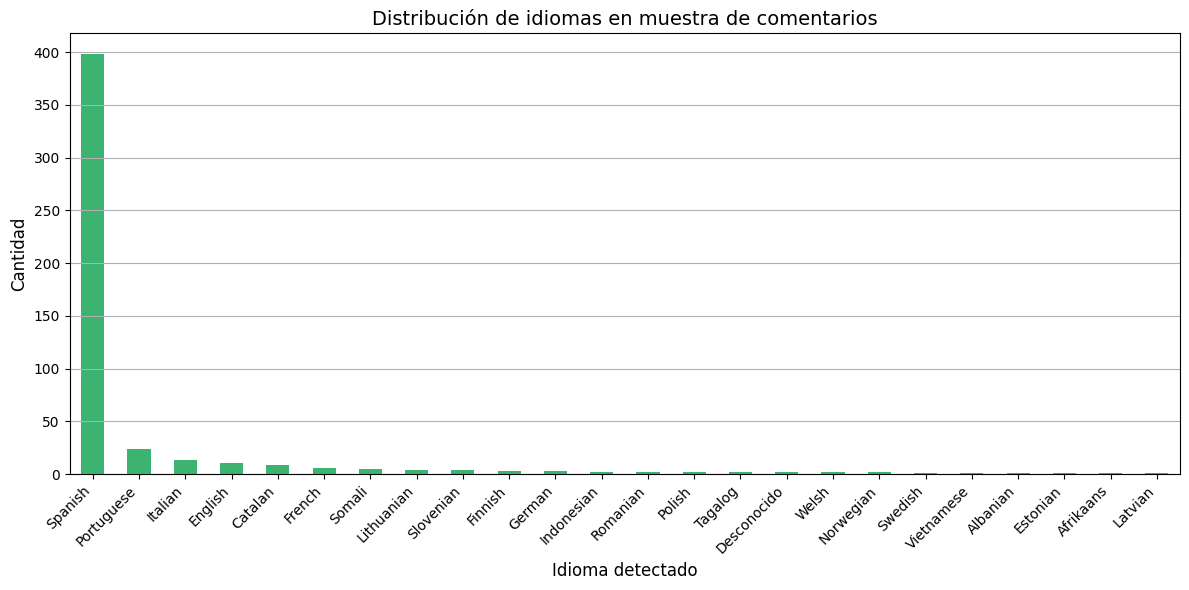

In [24]:
p.plot_language_distribution(df['text'], sample_size=500)

La mayoría de los comentarios están en español, con muy poca representación de otros idiomas; se puede trabajar principalmente sobre datos en español sin necesidad de procesamiento multilingüe general.

### Resumen general
- La mayoría de los comentarios son relativamente cortos (mediana ≈28 caracteres) y no generan likes ni respuestas; el engagement promedio es bajo, pero existen outliers que distorsionan las métricas (máximos muy altos).

- Los histogramas muestran una distribución sesgada, donde pocos comentarios concentran mucha interacción.
- El scatterplot entre likes y reply_count sugiere una relación débil o ruidosa: la mayoría de los puntos se agrupan en valores bajos, sin una tendencia clara.
- Se recomienda detectar el idioma de los comentarios porque, aunque se asume que la mayoría será en español por contexto temporal y geográfico (2021-2025), es necesario confirmarlo para preparar procesos de limpieza y el análisis de sentimiento.

In [25]:
df.to_csv(rp.EXP_SNAPSHOT_PATH, index=False, encoding='utf-8')

# 3. Limpieza y Preprocesamiento



In [27]:
df = pd.read_csv(rp.EXP_SNAPSHOT_PATH)
df.head()

,user,user_id,text,like,reply_count,timestamp,fecha_legible,tipo_de_item,emocion,comment_length,time
0,Navarrete 🦇,zoeee_77777,la vrdd no yo tenía el pelo en pelo en pausa y...,443,5,1728426278,2024-10-08 17:24:38,belleza-y-cuidado,testimonio,130,2024-10-08 17:24:38
1,LaCherryBoop,cherryboopxxx,Mí hermano es químico farmacéutico y dice que ...,910,8,1716524639,2024-05-23 23:23:59,belleza-y-cuidado,testimonio,174,2024-05-23 23:23:59
2,Ori✨,orianaa_rosaless,"úsenlo, yo tenía el cabello horrible y no sabe...",3827,32,1633898429,2021-10-10 15:40:29,belleza-y-cuidado,satisfaccion,104,2021-10-10 15:40:29
3,K'rol Rojas,karolrojas018,mi cabello cambio por completo desde que la em...,1587,41,1633893792,2021-10-10 14:23:12,belleza-y-cuidado,satisfaccion,139,2021-10-10 14:23:12
4,Fer💗,fer622301,si es mala? es que la acabo de comprar la rosa...,11,7,1737934854,2025-01-26 18:40:54,belleza-y-cuidado,consulta,50,2025-01-26 18:40:54


In [28]:
df.shape

(9669, 11)

In [30]:
df_nulos = df[df['text'].isnull()]
df_nulos

,user,user_id,text,like,reply_count,timestamp,fecha_legible,tipo_de_item,emocion,comment_length,time
2080,liz,lizchapiliquin,NaN,0,0,1746486105,2025-05-05 18:01:45,cuidado-piel,decepcion,3,2025-05-05 18:01:45
2091,yuliano,yuliano1717,NaN,0,0,1745966494,2025-04-29 17:41:34,cuidado-piel,satisfaccion,3,2025-04-29 17:41:34
2092,NaN,xo.lily24,NaN,0,0,1745957535,2025-04-29 15:12:15,cuidado-piel,satisfaccion,3,2025-04-29 15:12:15
2093,saraaa,saraaa71457,NaN,0,0,1745427949,2025-04-23 12:05:49,cuidado-piel,satisfaccion,3,2025-04-23 12:05:49
2094,tan,akaddh,NaN,0,0,1745218036,2025-04-21 01:47:16,cuidado-piel,satisfaccion,3,2025-04-21 01:47:16
...,...,...,...,...,...,...,...,...,...,...,...
4611,gonzalo carpio galle,gonzalocarpiogallegos,NaN,0,0,1740154240,2025-02-21 11:10:40,perfume,entusiasmo,3,2025-02-21 11:10:40
4620,franks pinado,tumarroncito20,NaN,0,0,1740151432,2025-02-21 10:23:52,perfume,confusion,3,2025-02-21 10:23:52
4653,lotso,lotso504,NaN,0,0,1740145004,2025-02-21 08:36:44,perfume,frustracion,3,2025-02-21 08:36:44
4685,radamanthys death,radamanthys76,NaN,0,0,1740141864,2025-02-21 07:44:24,perfume,sorpresa,3,2025-02-21 07:44:24


In [31]:
df = df.dropna(subset=['text'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9120 entries, 0 to 9668
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user            9064 non-null   object
 1   user_id         9120 non-null   object
 2   text            9120 non-null   object
 3   like            9120 non-null   int64 
 4   reply_count     9120 non-null   int64 
 5   timestamp       9120 non-null   int64 
 6   fecha_legible   9120 non-null   object
 7   tipo_de_item    9120 non-null   object
 8   emocion         9119 non-null   object
 9   comment_length  9120 non-null   int64 
 10  time            9120 non-null   object
dtypes: int64(4), object(7)
memory usage: 855.0+ KB


In [33]:
import emoji

In [34]:
has_emoji = df['text'].apply(lambda x: any(char in emoji.EMOJI_DATA for char in x))
df_with_emoji = df[has_emoji]

df_with_emoji[['text']].head(10)

,text
0,la vrdd no yo tenía el pelo en pelo en pausa y...
1,Mí hermano es químico farmacéutico y dice que ...
3,mi cabello cambio por completo desde que la em...
4,si es mala? es que la acabo de comprar la rosa...
7,Leyendo los comentarios a la gran mayoría le h...
16,"Yo lo usó, me queda bello y no se reseca, uso ..."
17,y uno le pregunta a ella que productos recomie...
19,Yo apunto de hacerme preshampoo 👁️👄👁️Ni modos ...
20,mentiraa es recontra mentira mi hermana lo usa...
23,No volveré a comprar 🥺 recomiendas la mascaril...


Los emojis en solitario suelen contener emociones muy claras (amor, risa, tristeza, enojo), por lo que si no los traducimos, se perdería esa información clave.

In [35]:
df_emocion_nulos = df[df['emocion'].isnull()]
print(df_emocion_nulos)

           user     user_id text  like  reply_count   timestamp  \
342  Ĉĥäá<3❤️‍🩹  chapis.150    😳     0            0  1745479227   

           fecha_legible       tipo_de_item emocion  comment_length  \
342  2025-04-24 02:20:27  belleza-y-cuidado     NaN               1   

                    time  
342  2025-04-24 02:20:27  


In [36]:
df = df.dropna(subset=['emocion'])
print(df['emocion'].isnull().sum())

0


In [37]:
from review_analyzer.dataset import clean_basic_text_preserve_emojis

In [39]:
df['comment_cleaned'] = df['text'].apply(clean_basic_text_preserve_emojis)
df.head()

,user,user_id,text,like,reply_count,timestamp,fecha_legible,tipo_de_item,emocion,comment_length,time,comment_cleaned
0,Navarrete 🦇,zoeee_77777,la vrdd no yo tenía el pelo en pelo en pausa y...,443,5,1728426278,2024-10-08 17:24:38,belleza-y-cuidado,testimonio,130,2024-10-08 17:24:38,la vrdd no yo tenía el pelo en pelo en pausa y...
1,LaCherryBoop,cherryboopxxx,Mí hermano es químico farmacéutico y dice que ...,910,8,1716524639,2024-05-23 23:23:59,belleza-y-cuidado,testimonio,174,2024-05-23 23:23:59,Mí hermano es químico farmacéutico y dice que ...
2,Ori✨,orianaa_rosaless,"úsenlo, yo tenía el cabello horrible y no sabe...",3827,32,1633898429,2021-10-10 15:40:29,belleza-y-cuidado,satisfaccion,104,2021-10-10 15:40:29,"úsenlo, yo tenía el cabello horrible y no sabe..."
3,K'rol Rojas,karolrojas018,mi cabello cambio por completo desde que la em...,1587,41,1633893792,2021-10-10 14:23:12,belleza-y-cuidado,satisfaccion,139,2021-10-10 14:23:12,mi cabello cambio por completo desde que la em...
4,Fer💗,fer622301,si es mala? es que la acabo de comprar la rosa...,11,7,1737934854,2025-01-26 18:40:54,belleza-y-cuidado,consulta,50,2025-01-26 18:40:54,si es mala? es que la acabo de comprar la rosa...


In [40]:
df['text'] = df['comment_cleaned']
df.drop(columns=['comment_cleaned'], inplace=True)
df.head()

,user,user_id,text,like,reply_count,timestamp,fecha_legible,tipo_de_item,emocion,comment_length,time
0,Navarrete 🦇,zoeee_77777,la vrdd no yo tenía el pelo en pelo en pausa y...,443,5,1728426278,2024-10-08 17:24:38,belleza-y-cuidado,testimonio,130,2024-10-08 17:24:38
1,LaCherryBoop,cherryboopxxx,Mí hermano es químico farmacéutico y dice que ...,910,8,1716524639,2024-05-23 23:23:59,belleza-y-cuidado,testimonio,174,2024-05-23 23:23:59
2,Ori✨,orianaa_rosaless,"úsenlo, yo tenía el cabello horrible y no sabe...",3827,32,1633898429,2021-10-10 15:40:29,belleza-y-cuidado,satisfaccion,104,2021-10-10 15:40:29
3,K'rol Rojas,karolrojas018,mi cabello cambio por completo desde que la em...,1587,41,1633893792,2021-10-10 14:23:12,belleza-y-cuidado,satisfaccion,139,2021-10-10 14:23:12
4,Fer💗,fer622301,si es mala? es que la acabo de comprar la rosa...,11,7,1737934854,2025-01-26 18:40:54,belleza-y-cuidado,consulta,50,2025-01-26 18:40:54


In [41]:
df.shape

(9119, 11)

In [42]:
df['word_count'] = df['text'].str.split().apply(len)

In [43]:
df[df['word_count'] < 5][['text']].sample(20, random_state=42)

,text
378,🤣
9659,información quiero para postular🥰
6525,😁
3819,informacion
1063,Love u carmen 💘
5247,@📷💥💫✨DRONE AVENTURA✨💫💥📷
6250,verdades que necesitamos saber
3424,110
8765,Donde se postula?
6546,🥰


In [44]:
word_count = 20
samples = 20

In [46]:
subset = df[df['word_count'] > word_count][['text']].sample(20, random_state=42)
for c in subset['text']:
    print(c, '\n' + '-' * 80)

traté de querer al gloss de fenty pero siento que las particulas de brillo son super grandes 😃 las siento cañon en los labios 
--------------------------------------------------------------------------------
estoy a punto de cancelar win, que malazo es el servicio, la senal se va por momentos, a probar internet wow dicen esta mejor. 
--------------------------------------------------------------------------------
que sus creativos son unos genios insultan sin ser groseros y sin referirse a nadie genial.... ahora por que se ofenderan si no estan haciendo alusion a ninguna marca de internet 
--------------------------------------------------------------------------------
tengo mas de un mes usandolo si me a disminuido las manchas de la piel pero cada que lo uso al la manana siguiente tengo pequenos brote sitos nativos y las marcas rojas siguen igual 
--------------------------------------------------------------------------------
desde bebé lo he usado y me sienta genial, tengo el pelo h

Comentarios muy cortos (<3 palabras) → si son solo emojis, se conservan; si son palabras genéricas, pueden filtrarse por baja relevancia.

Comentarios muy largos (>100 palabras) → aunque raros, muestran opiniones detalladas con carga emocional; se conservan tras revisión, no se eliminan automáticamente.

In [48]:
df.head()

,user,user_id,text,like,reply_count,timestamp,fecha_legible,tipo_de_item,emocion,comment_length,time,word_count
0,Navarrete 🦇,zoeee_77777,la vrdd no yo tenía el pelo en pelo en pausa y...,443,5,1728426278,2024-10-08 17:24:38,belleza-y-cuidado,testimonio,130,2024-10-08 17:24:38,25
1,LaCherryBoop,cherryboopxxx,Mí hermano es químico farmacéutico y dice que ...,910,8,1716524639,2024-05-23 23:23:59,belleza-y-cuidado,testimonio,174,2024-05-23 23:23:59,28
2,Ori✨,orianaa_rosaless,"úsenlo, yo tenía el cabello horrible y no sabe...",3827,32,1633898429,2021-10-10 15:40:29,belleza-y-cuidado,satisfaccion,104,2021-10-10 15:40:29,21
3,K'rol Rojas,karolrojas018,mi cabello cambio por completo desde que la em...,1587,41,1633893792,2021-10-10 14:23:12,belleza-y-cuidado,satisfaccion,139,2021-10-10 14:23:12,26
4,Fer💗,fer622301,si es mala? es que la acabo de comprar la rosa...,11,7,1737934854,2025-01-26 18:40:54,belleza-y-cuidado,consulta,50,2025-01-26 18:40:54,12


### Extracción de embeddings BERT

En este paso usamos un modelo BERT para convertir los comentarios textuales en representaciones numéricas (embeddings). 

Estos vectores capturan información semántica, incluyendo contexto, tono y significado, y servirán como entrada para los modelos de análisis emocional.


In [49]:
from review_analyzer.dataset import extract_bert_embeddings

In [50]:
comments = df['text'].tolist()

In [51]:
bert_embeddings = extract_bert_embeddings(comments, batch_size=16)

In [53]:
import numpy as np

In [54]:
np.save(rp.BERT_EMBEDDINGS, bert_embeddings)

#### Resumen

El dataset ha sido limpiado y preprocesado para usar con BERT:
- Remoción de comentarios nulos
- Solo limpieza mínima aplicada (URLs, hashtags, menciones).
- Emojis y mayúsculas preservados.
- No se aplicó stopword removal, lematización ni tokenización manual.
- Embeddings BERT generados y guardados.

# 3.5 Etiquetado de datos

Selección de muestra representativa (golden set) + semi-supervisado

In [55]:
df.head()

,user,user_id,text,like,reply_count,timestamp,fecha_legible,tipo_de_item,emocion,comment_length,time,word_count
0,Navarrete 🦇,zoeee_77777,la vrdd no yo tenía el pelo en pelo en pausa y...,443,5,1728426278,2024-10-08 17:24:38,belleza-y-cuidado,testimonio,130,2024-10-08 17:24:38,25
1,LaCherryBoop,cherryboopxxx,Mí hermano es químico farmacéutico y dice que ...,910,8,1716524639,2024-05-23 23:23:59,belleza-y-cuidado,testimonio,174,2024-05-23 23:23:59,28
2,Ori✨,orianaa_rosaless,"úsenlo, yo tenía el cabello horrible y no sabe...",3827,32,1633898429,2021-10-10 15:40:29,belleza-y-cuidado,satisfaccion,104,2021-10-10 15:40:29,21
3,K'rol Rojas,karolrojas018,mi cabello cambio por completo desde que la em...,1587,41,1633893792,2021-10-10 14:23:12,belleza-y-cuidado,satisfaccion,139,2021-10-10 14:23:12,26
4,Fer💗,fer622301,si es mala? es que la acabo de comprar la rosa...,11,7,1737934854,2025-01-26 18:40:54,belleza-y-cuidado,consulta,50,2025-01-26 18:40:54,12


In [56]:
df.shape

(9119, 12)

In [57]:
from transformers import pipeline

In [58]:
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

Device set to use cpu


In [60]:
df['bert_sentiment'] = df['text'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

In [61]:
pd.set_option('display.max_colwidth', None)

for label in df['bert_sentiment'].unique():
    print(f"\nEjemplos para {label}:")
    print(df[df['bert_sentiment'] == label][['text']].head(5))


Ejemplos para LABEL_2:
                                                                                                                                                    text
0                     la vrdd no yo tenía el pelo en pelo en pausa y empecé a usar mascarillas para pelo 1.de garnier fructis 😍 2.nutribela😍 3.pantene 😍
16                                             Yo lo usó, me queda bello y no se reseca, uso shampoo y acondicionador marca milagros 🥰 me gusta bastante
17                     y uno le pregunta a ella que productos recomienda y recomienda los que ella vende. los de natura😁 muy buena estrategia de venta👌😂
20  mentiraa es recontra mentira mi hermana lo usa dos años lo tiene bien lacio y muy bonito ahora ando usando y tambien me hizo bien🥰 y lo recomiendo 🥰
24                             esa vaina fue lo mejor que me pude haber comprado vean esos risos😌😌 gracias nutribela🥰por tener cosas tóxicas pero buenas

Ejemplos para LABEL_1:
                                  

In [62]:
df['bert_sentiment'].value_counts()

bert_sentiment
LABEL_1    7829
LABEL_2    1045
LABEL_0     245
Name: count, dtype: int64

In [63]:
label_map = {
    'LABEL_0': 'negative',
    'LABEL_1': 'neutral',
    'LABEL_2': 'positive'
}

df['bert_sentiment'] = df['bert_sentiment'].map(label_map)

In [64]:
df.head()

,user,user_id,text,like,reply_count,timestamp,fecha_legible,tipo_de_item,emocion,comment_length,time,word_count,bert_sentiment
0,Navarrete 🦇,zoeee_77777,la vrdd no yo tenía el pelo en pelo en pausa y empecé a usar mascarillas para pelo 1.de garnier fructis 😍 2.nutribela😍 3.pantene 😍,443,5,1728426278,2024-10-08 17:24:38,belleza-y-cuidado,testimonio,130,2024-10-08 17:24:38,25,positive
1,LaCherryBoop,cherryboopxxx,"Mí hermano es químico farmacéutico y dice que recomienda estos productos porque son más naturales que otras mascarillas, así también una mascarilla de Pantene que amo usar. 🤔",910,8,1716524639,2024-05-23 23:23:59,belleza-y-cuidado,testimonio,174,2024-05-23 23:23:59,28,neutral
2,Ori✨,orianaa_rosaless,"úsenlo, yo tenía el cabello horrible y no saben el cambio que me dio cuando lo empecé a usar, es mágico.",3827,32,1633898429,2021-10-10 15:40:29,belleza-y-cuidado,satisfaccion,104,2021-10-10 15:40:29,21,negative
3,K'rol Rojas,karolrojas018,"mi cabello cambio por completo desde que la empecé a usar😏 está súper largo,súper suave y mejor que nunca 🤷creo que no a todas les funciona",1587,41,1633893792,2021-10-10 14:23:12,belleza-y-cuidado,satisfaccion,139,2021-10-10 14:23:12,26,neutral
4,Fer💗,fer622301,si es mala? es que la acabo de comprar la rosa 😭😭😭,11,7,1737934854,2025-01-26 18:40:54,belleza-y-cuidado,consulta,50,2025-01-26 18:40:54,12,neutral


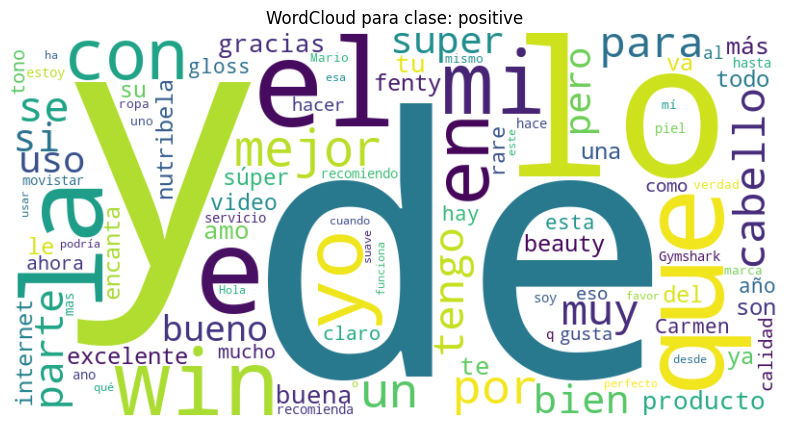

In [65]:
class_name = 'positive'

p.plot_wordcloud_for_class(df, text_col='text', class_col='bert_sentiment', class_value=class_name)


In [66]:
from review_analyzer.config import BERT_SENTIMENT_PATH

In [67]:
df.to_csv(BERT_SENTIMENT_PATH, index=False)

labeled_golden_set = pd.read_csv(GOLDEN_SET_LABELED_PATH)

labeled_golden_set = pd.read_csv(GOLDEN_SET_LABELED_PATH)

df = pd.concat([df, labeled_golden_set['label'].rename('emotion_label')], axis=1)

df.head()

print(df['emotion_label'].unique())
print(df['emotion_label'].isnull().sum())

Terminado el etiquetado (golden set), preparamos modelo semi-supervisado

golden_set = df[df['emotion_label'].notnull()]
unlabeled_set = df[df['emotion_label'].isnull()]

In [68]:
from review_analyzer.config import BERT_SENTIMENT_PATH

In [69]:
df = pd.read_csv(BERT_SENTIMENT_PATH)

In [70]:
df.head()

,user,user_id,text,like,reply_count,timestamp,fecha_legible,tipo_de_item,emocion,comment_length,time,word_count,bert_sentiment
0,Navarrete 🦇,zoeee_77777,la vrdd no yo tenía el pelo en pelo en pausa y empecé a usar mascarillas para pelo 1.de garnier fructis 😍 2.nutribela😍 3.pantene 😍,443,5,1728426278,2024-10-08 17:24:38,belleza-y-cuidado,testimonio,130,2024-10-08 17:24:38,25,positive
1,LaCherryBoop,cherryboopxxx,"Mí hermano es químico farmacéutico y dice que recomienda estos productos porque son más naturales que otras mascarillas, así también una mascarilla de Pantene que amo usar. 🤔",910,8,1716524639,2024-05-23 23:23:59,belleza-y-cuidado,testimonio,174,2024-05-23 23:23:59,28,neutral
2,Ori✨,orianaa_rosaless,"úsenlo, yo tenía el cabello horrible y no saben el cambio que me dio cuando lo empecé a usar, es mágico.",3827,32,1633898429,2021-10-10 15:40:29,belleza-y-cuidado,satisfaccion,104,2021-10-10 15:40:29,21,negative
3,K'rol Rojas,karolrojas018,"mi cabello cambio por completo desde que la empecé a usar😏 está súper largo,súper suave y mejor que nunca 🤷creo que no a todas les funciona",1587,41,1633893792,2021-10-10 14:23:12,belleza-y-cuidado,satisfaccion,139,2021-10-10 14:23:12,26,neutral
4,Fer💗,fer622301,si es mala? es que la acabo de comprar la rosa 😭😭😭,11,7,1737934854,2025-01-26 18:40:54,belleza-y-cuidado,consulta,50,2025-01-26 18:40:54,12,neutral


In [72]:
numeric_columns = ['like', 'reply_count', 'comment_length']
target_numeric = pd.factorize(df['bert_sentiment'])[0]
corr_df = pd.concat([df[numeric_columns], pd.Series(target_numeric, name='bert_sentiment_numeric')], axis=1)

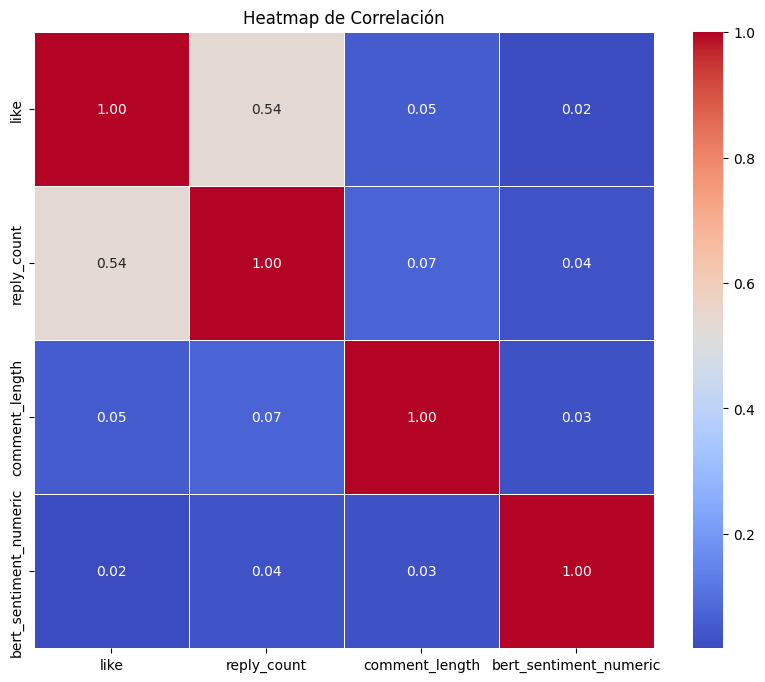

In [73]:
p.plot_correlation_heatmap(corr_df, corr_df.columns)

No hay correlación lineal fuerte entre las métricas de popularidad (likes, reply_count) y las etiquetas de sentimiento, lo cual indica que las clases emocionales no dependen directamente de la popularidad ni de la extensión textual.

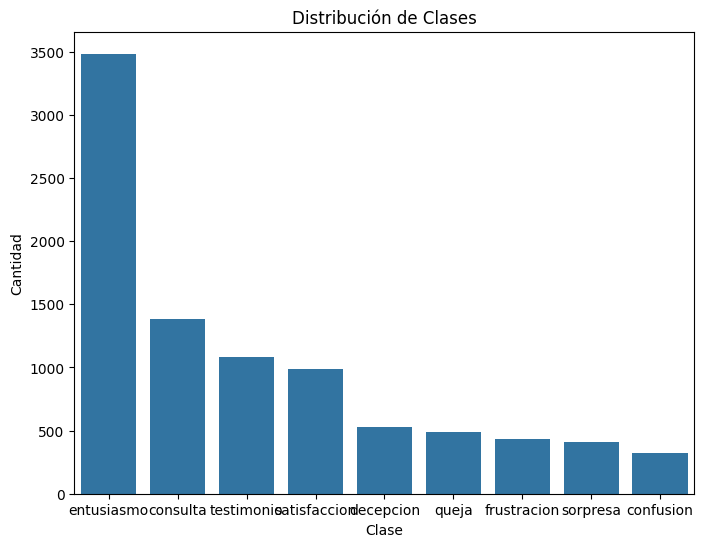

In [76]:
p.plot_class_distribution(df, 'emocion')

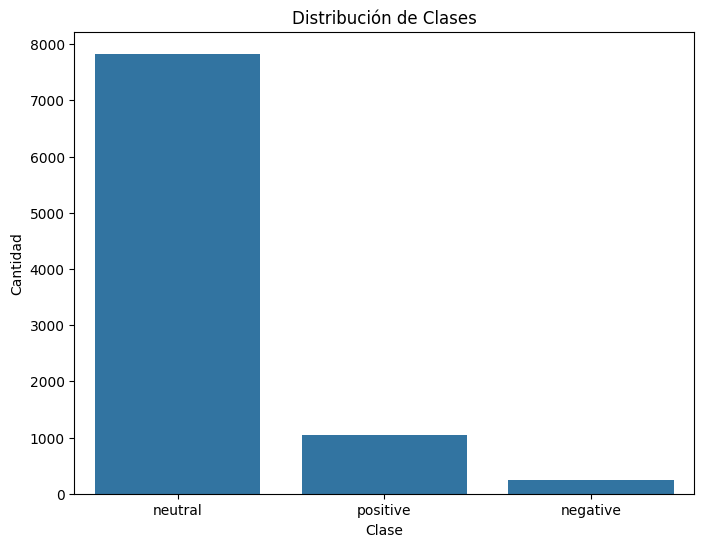

In [77]:
p.plot_class_distribution(df, 'bert_sentiment')

El gráfico muestra un fuerte desbalance de clases, donde la mayoría de comentarios son neutrales, pocos positivos y muy pocos negativos. Será necesario considerar técnicas de balanceo antes del modelado.

#### Análisis final:

Tras los análisis realizados, confirmamos que los features relevantes para modelado son los embeddings BERT y las etiquetas emocionales. 

Variables como likes y reply_count **no aportan valor predictivo significativo** y se excluyen del set final. El dataset queda listo para la fase de modelado supervisado.

In [78]:
from review_analyzer.config import FINAL_PROCESSED_DATA_PATH

In [80]:
columns_to_drop = ['like', 'reply_count']
df = df.drop(columns=columns_to_drop)

Comentarios vacíos restantes

In [82]:
df = df.dropna(subset=['text'])
df = df[df['text'].str.strip() != '']

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8897 entries, 0 to 9118
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user            8843 non-null   object
 1   user_id         8897 non-null   object
 2   text            8897 non-null   object
 3   timestamp       8897 non-null   int64 
 4   fecha_legible   8897 non-null   object
 5   tipo_de_item    8897 non-null   object
 6   emocion         8897 non-null   object
 7   comment_length  8897 non-null   int64 
 8   time            8897 non-null   object
 9   word_count      8897 non-null   int64 
 10  bert_sentiment  8897 non-null   object
dtypes: int64(3), object(8)
memory usage: 834.1+ KB


In [84]:
df.to_csv(FINAL_PROCESSED_DATA_PATH, index=False)

# 5. Feature Engineering

Transformar texto en vectores numéricos utilizables por el modelo.

In [85]:
df = pd.read_csv(FINAL_PROCESSED_DATA_PATH)

In [86]:
df.head()

,user,user_id,text,timestamp,fecha_legible,tipo_de_item,emocion,comment_length,time,word_count,bert_sentiment
0,Navarrete 🦇,zoeee_77777,la vrdd no yo tenía el pelo en pelo en pausa y empecé a usar mascarillas para pelo 1.de garnier fructis 😍 2.nutribela😍 3.pantene 😍,1728426278,2024-10-08 17:24:38,belleza-y-cuidado,testimonio,130,2024-10-08 17:24:38,25,positive
1,LaCherryBoop,cherryboopxxx,"Mí hermano es químico farmacéutico y dice que recomienda estos productos porque son más naturales que otras mascarillas, así también una mascarilla de Pantene que amo usar. 🤔",1716524639,2024-05-23 23:23:59,belleza-y-cuidado,testimonio,174,2024-05-23 23:23:59,28,neutral
2,Ori✨,orianaa_rosaless,"úsenlo, yo tenía el cabello horrible y no saben el cambio que me dio cuando lo empecé a usar, es mágico.",1633898429,2021-10-10 15:40:29,belleza-y-cuidado,satisfaccion,104,2021-10-10 15:40:29,21,negative
3,K'rol Rojas,karolrojas018,"mi cabello cambio por completo desde que la empecé a usar😏 está súper largo,súper suave y mejor que nunca 🤷creo que no a todas les funciona",1633893792,2021-10-10 14:23:12,belleza-y-cuidado,satisfaccion,139,2021-10-10 14:23:12,26,neutral
4,Fer💗,fer622301,si es mala? es que la acabo de comprar la rosa 😭😭😭,1737934854,2025-01-26 18:40:54,belleza-y-cuidado,consulta,50,2025-01-26 18:40:54,12,neutral


Variables adicionales a eliminar:

- user → solo es identificador, no tiene valor predictivo.
- user_id → similar a `user`, es un ID único que no aporta valor semántico para el modelo.
- time → no estamos haciendo análisis temporal ni predicción por fecha.
- origen → si todos vienen del mismo archivo, no aporta; si no, revisar.

**Nota:** También revisamos variables como `timestamp` y `fecha_legible`; si no se planea hacer análisis temporal más adelante, podrían ser eliminadas igualmente.

In [88]:
columns_to_drop = ['user', 'user_id', 'time', 'tipo_de_item']
df = df.drop(columns=columns_to_drop)
df.to_csv(FINAL_PROCESSED_DATA_PATH, index=False)

In [89]:
df.head()

,text,timestamp,fecha_legible,emocion,comment_length,word_count,bert_sentiment
0,la vrdd no yo tenía el pelo en pelo en pausa y empecé a usar mascarillas para pelo 1.de garnier fructis 😍 2.nutribela😍 3.pantene 😍,1728426278,2024-10-08 17:24:38,testimonio,130,25,positive
1,"Mí hermano es químico farmacéutico y dice que recomienda estos productos porque son más naturales que otras mascarillas, así también una mascarilla de Pantene que amo usar. 🤔",1716524639,2024-05-23 23:23:59,testimonio,174,28,neutral
2,"úsenlo, yo tenía el cabello horrible y no saben el cambio que me dio cuando lo empecé a usar, es mágico.",1633898429,2021-10-10 15:40:29,satisfaccion,104,21,negative
3,"mi cabello cambio por completo desde que la empecé a usar😏 está súper largo,súper suave y mejor que nunca 🤷creo que no a todas les funciona",1633893792,2021-10-10 14:23:12,satisfaccion,139,26,neutral
4,si es mala? es que la acabo de comprar la rosa 😭😭😭,1737934854,2025-01-26 18:40:54,consulta,50,12,neutral


In [90]:
X_text = df['text']
X_numeric = df[['comment_length', 'word_count']]
y = df['bert_sentiment']

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [94]:
tfidf = TfidfVectorizer(max_features=5000) 
X_text_tfidf = tfidf.fit_transform(X_text)

In [95]:
from sklearn.preprocessing import RobustScaler
import numpy as np

In [96]:
scaler = RobustScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

In [97]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

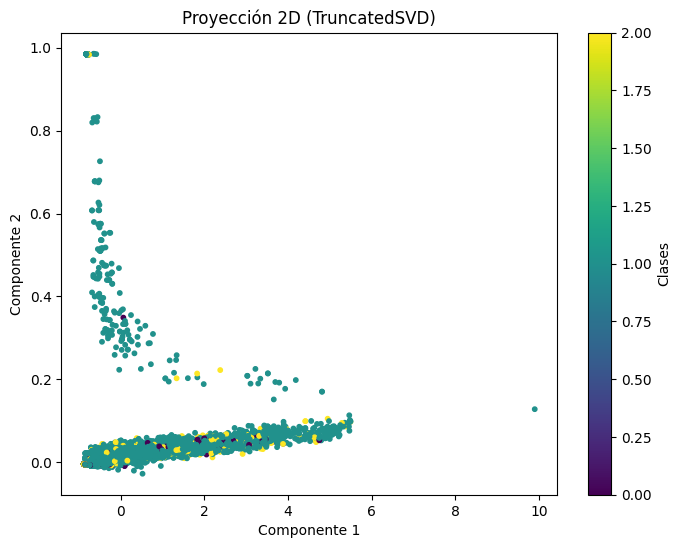

In [98]:
from scipy.sparse import hstack
X_combined = hstack([X_text_tfidf, X_numeric_scaled])

svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X_combined)

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_encoded, cmap='viridis', s=10)
plt.title('Proyección 2D (TruncatedSVD)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Clases')
plt.show()

El gráfico de proyección 2D con TruncatedSVD muestra que las clases de sentimiento (neutral, positivo, negativo) no están claramente separadas en el espacio reducido; los puntos aparecen mezclados y agrupados densamente en ciertas áreas. Esto sugiere que:

- Los datos no son linealmente separables, por lo que modelos simples (como regresión logística lineal) podrían tener un desempeño limitado.

- Será necesario aplicar modelos capaces de capturar relaciones no lineales (Random Forest, Gradient Boosting, redes neuronales).

- Mejorar las representaciones del texto usando embeddings contextuales (como BERT) podría ayudar a obtener una separación más clara entre clases.

- También puede ser útil explorar técnicas de reducción dimensional más avanzadas (como t-SNE) para analizar patrones más complejos.

# 6. Entrenamiento de Modelos

In [103]:
tfidf = TfidfVectorizer(max_features=5000)
X_text_tfidf = tfidf.fit_transform(X_text)

In [104]:
scaler = RobustScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

In [105]:
X_final = hstack([X_text_tfidf, X_numeric_scaled])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [106]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [110]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

In [111]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [112]:
y_pred = rf_model.predict(X_test)

In [113]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8657303370786517

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.18      0.29        49
           1       0.90      0.95      0.93      1522
           2       0.53      0.39      0.45       209

    accuracy                           0.87      1780
   macro avg       0.69      0.51      0.55      1780
weighted avg       0.85      0.87      0.85      1780


Confusion Matrix:
 [[   9   35    5]
 [   5 1451   66]
 [   0  128   81]]


#### Clase 0 (probablemente “positivo” o “negativo”):

- **Precision:** 0.64
- **Recall:** 0.18 ➔ *Muy bajo* → el modelo no logra capturar bien esta clase (solo detecta ~18% de los verdaderos casos).
- **F1-score:** 0.29 → *Rendimiento pobre*.

---

#### Clase 1 (mayoría):

- **Precision:** 0.90
- **Recall:** 0.95 ➔ *Excelente* → esta clase domina y el modelo lo hace muy bien aquí.
- **F1-score:** 0.93 → *Rendimiento muy fuerte*.

---

#### Clase 2:

- **Precision:** 0.53
- **Recall:** 0.39 ➔ *Rendimiento moderado-bajo*.
- **F1-score:** 0.45 → *Necesita mejorar*.

In [114]:
importances = rf_model.feature_importances_
print("Importancia de características (top 10):")
print(sorted(importances, reverse=True)[:10])

Importancia de características (top 10):
[np.float64(0.1191935792316555), np.float64(0.03167355686669088), np.float64(0.01490754550636439), np.float64(0.011819651769816837), np.float64(0.010921125482967411), np.float64(0.008556820749541262), np.float64(0.007745816119220579), np.float64(0.007483981010884244), np.float64(0.007042960365177379), np.float64(0.007038692276348922)]


In [50]:
from scipy.sparse import hstack

X_final = hstack([X_text_tfidf, X_numeric_scaled])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)